In [1]:
import pandas
import re
data = [line.strip() for line in open("C:\\Users\\Abhilasha\\Desktop\\train_set.txt", "r").readlines()]
data = [{"ALineNumber": line.split('~')[0], "Type": ((((line.split('~')[1]).split("INFO")[0]).split("log.")[0]).split("gs.")[1]).split(".")[0], "Time": (((line.split('~')[1]).split("INFO")[0]).split("log.")[1]),"Description": (re.sub('[^a-zA-Z]', ' ', re.sub(r'\[[^)]*\]', '', line.split("INFO")[1]))).lower()} for line in data]
data = pandas.DataFrame(data)
data.head()

,ALineNumber,Description,Time,Type
0,L0,gs resource resource tracker active base fil...,"60.Sep 09, 2019_10:45 17162",api
1,L1,gs resource manager instance destroyed succe...,14.2019-09-02_07:57 AM 60858,api
2,L2,gs api openstack compute wsgi vm resumed li...,65.11-09-2019_04:57 AM 72310,api
3,L3,gs openapi server get latest meta data blo...,82.07-09-2019_05:17 PM 5534,compute
4,L4,gs openstack server removing base or swap fi...,15.2019-09-14_16:27 39946,api


In [2]:
new_data=data.drop(columns=["Time", "Type"])
new_data

,ALineNumber,Description
0,L0,gs resource resource tracker active base fil...
1,L1,gs resource manager instance destroyed succe...
2,L2,gs api openstack compute wsgi vm resumed li...
3,L3,gs openapi server get latest meta data blo...
4,L4,gs openstack server removing base or swap fi...
5,L5,gs api openstack compute wsgi vm paused lif...
6,L6,gs compute manager post v fpzkcurqo xst i...
7,L7,gs openapi server get latest meta data blo...
8,L8,gs openstack server instance destroyed succe...
9,L9,gs compute resource tracker get latest met...


In [3]:
text = new_data['Description'].str.cat(sep=' ')
word_list = text.lower().split(None)
word_freq = {}
for word in word_list:
    word_freq[word] = word_freq.get(word, 0) + 1
stop_words=[]
keys = sorted(word_freq.keys())
for word in keys:
    print ("%-10s %d" % (word, word_freq[word]))
    if word_freq[word]<20:
        stop_words.append(word)

a          19
abg        2
active     20
ad         2
aez        1
afz        1
aiv        1
aj         1
ajgn       1
al         1
alhwbmq    1
allocated  66
ame        1
ami        46
amlkt      1
any        81
aofjpzrsmycn 1
aomju      1
api        205
apj        1
aq         1
aqge       1
aqk        2
aque       4
arqu       1
arxjfu     2
as         1
avtbogk    1
awg        1
ayc        1
az         6
azi        2
b          25
base       302
bc         1
bdsu       3
be         3
bg         3
bi         4
bjn        3
bk         2
bkrt       1
block      75
blvs       2
bm         1
bmp        1
bo         1
bord       1
bql        5
bs         2
bt         4
buc        1
build      17
bus        1
bvathc     2
bvj        1
bw         1
bzgwncosah 1
bztu       1
c          8
cb         6
ce         1
cf         1
cgksh      1
cgw        1
ch         1
chpd       1
cj         7
cjd        4
claims     82
clspd      1
cm         1
cmhkf      3
cn         6
cnklvu     4
compute   

In [4]:
print(stop_words)

['a', 'abg', 'ad', 'aez', 'afz', 'aiv', 'aj', 'ajgn', 'al', 'alhwbmq', 'ame', 'amlkt', 'aofjpzrsmycn', 'aomju', 'apj', 'aq', 'aqge', 'aqk', 'aque', 'arqu', 'arxjfu', 'as', 'avtbogk', 'awg', 'ayc', 'az', 'azi', 'bc', 'bdsu', 'be', 'bg', 'bi', 'bjn', 'bk', 'bkrt', 'blvs', 'bm', 'bmp', 'bo', 'bord', 'bql', 'bs', 'bt', 'buc', 'build', 'bus', 'bvathc', 'bvj', 'bw', 'bzgwncosah', 'bztu', 'c', 'cb', 'ce', 'cf', 'cgksh', 'cgw', 'ch', 'chpd', 'cj', 'cjd', 'clspd', 'cm', 'cmhkf', 'cn', 'cnklvu', 'con', 'cqjwp', 'csrwtah', 'ct', 'ctv', 'cujav', 'cw', 'cxekmg', 'cz', 'czg', 'd', 'danv', 'db', 'dbeuj', 'dcnab', 'destroy', 'df', 'dfynt', 'dj', 'djhc', 'dm', 'do', 'doct', 'dr', 'dsm', 'du', 'dua', 'dulao', 'dw', 'dwqbe', 'dx', 'dxu', 'e', 'eam', 'eaox', 'easb', 'ef', 'eg', 'ej', 'ejk', 'ek', 'en', 'enwlc', 'epdv', 'eq', 'eqb', 'er', 'eu', 'eva', 'evi', 'ew', 'ewzi', 'exg', 'expd', 'eyq', 'ezvs', 'f', 'fa', 'fami', 'fatemx', 'faus', 'fbq', 'fcpz', 'fcs', 'fcvp', 'fd', 'fezlkrqmy', 'fhnmt', 'fin', 'fns

In [5]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "inversely"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

stemming: invers
lemmatization: inversely


In [6]:
corpus = []
for i in range(0, 1050):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', data['Description'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [7]:
corpus[9]

'g compute resource tracker get latest meta data block device mapping root http status len time'

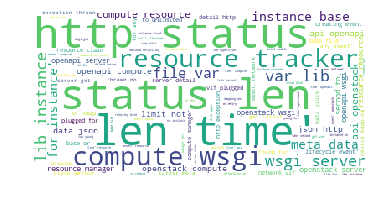

In [10]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt 
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [11]:
new_data["keywords"]=corpus
new_data

,ALineNumber,Description,keywords
0,L0,gs resource resource tracker active base fil...,g resource resource tracker active base file v...
1,L1,gs resource manager instance destroyed succe...,g resource manager instance destroyed successf...
2,L2,gs api openstack compute wsgi vm resumed li...,g api openstack compute wsgi vm resumed lifecy...
3,L3,gs openapi server get latest meta data blo...,g openapi server get latest meta data block de...
4,L4,gs openstack server removing base or swap fi...,g openstack server removing base or swap file ...
5,L5,gs api openstack compute wsgi vm paused lif...,g api openstack compute wsgi vm paused lifecyc...
6,L6,gs compute manager post v fpzkcurqo xst i...,g compute manager post v i server detail http ...
7,L7,gs openapi server get latest meta data blo...,g openapi server get latest meta data block de...
8,L8,gs openstack server instance destroyed succe...,g openstack server instance destroyed successf...
9,L9,gs compute resource tracker get latest met...,g compute resource tracker get latest meta dat...


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

documents = new_data["keywords"]

vectorizer = TfidfVectorizer(stop_words)
X = vectorizer.fit_transform(documents)

#true_k = 10
#model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
#model.fit(X)

Sum_of_squared_distances = []
K = range(1,25)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

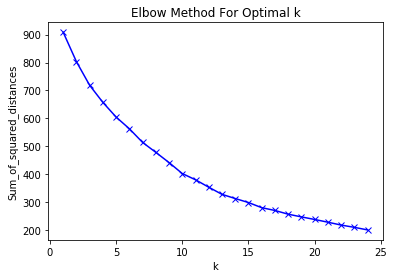

In [13]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

documents = new_data["keywords"]

vectorizer = TfidfVectorizer(stop_words)
X = vectorizer.fit_transform(documents)

true_k = 20
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=20, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 network
 for
 vif
 plugged
 creating
 event
 instance
 deallocate
 take
 wsgi
Cluster 1:
 mapping
 block
 device
 latest
 meta
 data
 get
 ami
 status
 len
Cluster 2:
 memory
 total
 gb
 specified
 defaulting
 unlimited
 not
 limit
 manager
 to
Cluster 3:
 the
 second
 hypervisor
 took
 on
 to
 instance
 spawn
 take
 compute
Cluster 4:
 base
 var
 file
 lib
 instance
 removable
 unknown
 active
 resource
 wsgi
Cluster 5:
 base
 removing
 or
 swap
 file
 lib
 var
 instance
 wsgi
 openapi
Cluster 6:
 no
 any
 found
 thrown
 exception
 entry
 for
 event
 http
 openstack
Cluster 7:
 lifecycle
 vm
 event
 paused
 resumed
 started
 wsgi
 server
 openapi
 compute
Cluster 8:
 total
 vcpus
 usable
 allocated
 vgpus
 gb
 disk
 compute
 resource
 wsgi
Cluster 9:
 detail
 server
 status
 time
 len
 http
 delete
 post
 openapi
 openstack
Cluster 10:
 deleting
 instance
 file
 lib
 var
 manager
 resource
 openapi
 server
 compute
Cluster 11:
 vendor
 json
 data
 ge

In [16]:
#testing 
import pandas
import re
data = [line.strip() for line in open("C:\\Users\\Abhilasha\\Desktop\\public_test_set.txt", "r").readlines()]
data = [{"ALineNumber": line.split('~')[0], "Type": ((((line.split('~')[1]).split("INFO")[0]).split("log.")[0]).split("gs.")[1]).split(".")[0], "Time": (((line.split('~')[1]).split("INFO")[0]).split("log.")[1]),"Description": (re.sub('[^a-zA-Z]', ' ', re.sub(r'\[[^)]*\]', '', line.split("INFO")[1]))).lower()} for line in data]
data = pandas.DataFrame(data)
data.head()

,ALineNumber,Description,Time,Type
0,L0,gs openapi server vcpu limit not specified ...,"69_Sep 14, 2019_13:20:00 58233",api
1,L1,gs openstack server took seconds to spa...,56.10-09-2019_04:18 PM 60109,compute
2,L2,gs compute manager http exception thrown no...,84_11-09-2019_09:30 80226,api
3,L3,gs openstack server get v vend...,"94.Sep 07, 2019_13:04 57889",compute
4,L4,gs api openapi compute wsgi total memory lim...,"40_Sep 11, 2019_23:18:00 61822",api


In [17]:
test_data=data.drop(columns=["Time", "Type"])
test_data

,ALineNumber,Description
0,L0,gs openapi server vcpu limit not specified ...
1,L1,gs openstack server took seconds to spa...
2,L2,gs compute manager http exception thrown no...
3,L3,gs openstack server get v vend...
4,L4,gs api openapi compute wsgi total memory lim...
5,L5,gs api openapi compute wsgi get v ...
6,L6,gs openstack wsgi server http exception thro...
7,L7,gs openapi wsgi server get v m...
8,L8,gs api openapi compute wsgi instance spawned...
9,L9,gs api openapi compute wsgi takes secon...


In [18]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "inversely"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

stemming: invers
lemmatization: inversely


In [19]:
t_corpus = []
for i in range(0, 702):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', data['Description'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
   
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    t_corpus.append(text)

In [20]:
t_corpus[11]

'g resource resource tracker get latest meta data block device mapping ami http status len time'

In [21]:
test_data["keywords"]=t_corpus
test_data

,ALineNumber,Description,keywords
0,L0,gs openapi server vcpu limit not specified ...,g openapi server vcpu limit not specified defa...
1,L1,gs openstack server took seconds to spa...,g openstack server took second to spawn the in...
2,L2,gs compute manager http exception thrown no...,g compute manager http exception thrown no ins...
3,L3,gs openstack server get v vend...,g openstack server get v vendor data json http...
4,L4,gs api openapi compute wsgi total memory lim...,g api openapi compute wsgi total memory limit ...
5,L5,gs api openapi compute wsgi get v ...,g api openapi compute wsgi get v meta data jso...
6,L6,gs openstack wsgi server http exception thro...,g openstack wsgi server http exception thrown ...
7,L7,gs openapi wsgi server get v m...,g openapi wsgi server get v meta data json htt...
8,L8,gs api openapi compute wsgi instance spawned...,g api openapi compute wsgi instance spawned co...
9,L9,gs api openapi compute wsgi takes secon...,g api openapi compute wsgi take second to the ...


In [22]:
c=0
ans=[]
for i in test_data["keywords"]:
    st=[]
    st.append(i)
    Y = vectorizer.transform(st)
    prediction = model.predict(Y)
    ans.append("C"+str(int(prediction)))

    print("L"+str(c),"C"+str(int(prediction)))
    c+=1

L0 C14
L1 C3
L2 C18
L3 C11
L4 C2
L5 C17
L6 C6
L7 C17
L8 C16
L9 C3
L10 C9
L11 C1
L12 C3
L13 C0
L14 C19
L15 C19
L16 C9
L17 C3
L18 C1
L19 C18
L20 C7
L21 C10
L22 C19
L23 C9
L24 C5
L25 C4
L26 C1
L27 C5
L28 C4
L29 C9
L30 C18
L31 C7
L32 C13
L33 C17
L34 C8
L35 C6
L36 C0
L37 C7
L38 C15
L39 C3
L40 C18
L41 C13
L42 C9
L43 C3
L44 C9
L45 C2
L46 C19
L47 C15
L48 C9
L49 C18
L50 C17
L51 C12
L52 C14
L53 C11
L54 C9
L55 C9
L56 C4
L57 C9
L58 C17
L59 C18
L60 C2
L61 C7
L62 C9
L63 C7
L64 C4
L65 C9
L66 C1
L67 C10
L68 C6
L69 C7
L70 C17
L71 C3
L72 C4
L73 C0
L74 C1
L75 C9
L76 C4
L77 C7
L78 C0
L79 C17
L80 C15
L81 C7
L82 C4
L83 C4
L84 C3
L85 C17
L86 C0
L87 C6
L88 C18
L89 C8
L90 C7
L91 C1
L92 C1
L93 C3
L94 C0
L95 C4
L96 C11
L97 C10
L98 C0
L99 C3
L100 C3
L101 C19
L102 C0
L103 C0
L104 C8
L105 C1
L106 C15
L107 C16
L108 C9
L109 C1
L110 C0
L111 C3
L112 C15
L113 C7
L114 C9
L115 C5
L116 C16
L117 C7
L118 C3
L119 C7
L120 C17
L121 C9
L122 C12
L123 C8
L124 C12
L125 C7
L126 C9
L127 C17
L128 C8
L129 C8
L130 C0
L131 C10
L132 C6
L1

In [24]:
pandas.DataFrame({'LineNumber':test_data["ALineNumber"],'Class':ans}).to_csv('submit_final.csv')